In [34]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import sklearn

In [10]:
df = yf.download("INFY.NS", period="5y")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_77884\1956484635.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("INFY.NS", period="5y")
[*********************100%***********************]  1 of 1 completed


In [ ]:
print(df.columns) #Detected additional column

MultiIndex([( 'Close', 'INFY.NS'),
            (  'High', 'INFY.NS'),
            (   'Low', 'INFY.NS'),
            (  'Open', 'INFY.NS'),
            ('Volume', 'INFY.NS')],
           names=['Price', 'Ticker'])


In [ ]:
df.columns = [col[0] for col in df.columns] #Flatten the dataset to make single column
df.head() 

,Close,High,Low,Open,Volume
Date,,,,,
2020-06-22,625.837280,630.284042,622.546666,628.861046,7804096
2020-06-23,640.911865,644.335850,615.520809,618.722511,12157390
2020-06-24,635.131104,646.381380,630.906679,637.576823,10220838
2020-06-25,622.991333,627.527008,616.765866,626.859994,14945284
2020-06-26,665.413513,668.437279,631.440239,631.618120,26030458


In [ ]:
df.isnull().sum() #No NaN values present (Happy happy happy)

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

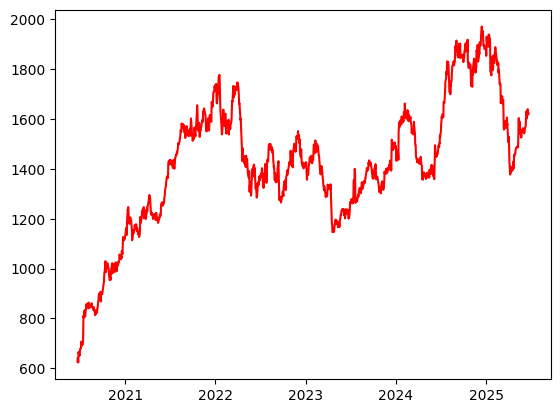

In [35]:
plt.plot(df.index, df["Close"], color="red")

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
scaled #numpy array(can't use reshape, so convert back to Dataframe using pandas)

array([[0.00210973, 0.00204061, 0.00526423, 0.00751537, 0.08629784],
       [0.01328467, 0.01244101, 0.        , 0.        , 0.13443665],
       [0.00899934, 0.013955  , 0.0115281 , 0.01397609, 0.11302222],
       ...,
       [0.74865558, 0.7528571 , 0.75337101, 0.74295568, 0.06225341],
       [0.73790659, 0.74197698, 0.74625299, 0.74510538, 0.05692403],
       [0.74124248, 0.74249505, 0.74430492, 0.74147315, 0.10172126]],
      shape=(1240, 5))

In [42]:
scaled_df = pd.DataFrame(scaled, columns=df.columns, index=df.index)
scaled_df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-06-22,0.002110,0.002041,0.005264,0.007515,0.086298
2020-06-23,0.013285,0.012441,0.000000,0.000000,0.134437
2020-06-24,0.008999,0.013955,0.011528,0.013976,0.113022
2020-06-25,0.000000,0.000000,0.000933,0.006032,0.165265
2020-06-26,0.031448,0.030280,0.011928,0.009559,0.287845
